Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'cost=', '2.040888249')
('Epoch:', '0002', 'cost=', '1.651046101')
('Epoch:', '0003', 'cost=', '1.391862698')
('Epoch:', '0004', 'cost=', '1.215172755')
('Epoch:', '0005', 'cost=', '1.089838774')
('Epoch:', '0006', 'cost=', '0.997157159')
('Epoch:', '0007', 'cost=', '0.926090856')
('Epoch:', '0008', 'cost=', '0.869877241')
('Epoch:', '0009', 'cost=', '0.824261770')
('Epoch:', '0010', 'cost=', '0.786465642')
('Epoch:', '0011', 'cost=', '0.754620570')
('Epoch:', '0012', 'cost=', '0.727332269')
('Epoch:', '0013', 'cost=', '0.703676064')
('Epoch:', '0014', 'cost=', '0.682967587')
('Epoch:', '0015', 'cost=', '0.664633063')
('Epoch:', '0016', 'cost=', '0.648277897')
('Epoch:', '0017', 'cost=', '0.633597143')
('Epoch:', '0018', 'cost=', '0.620310391')
('Epoch:', '0019', 'cost=', '0.60823

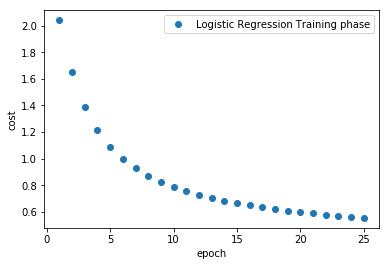

('Model accuracy:', 0.87849998)


In [1]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
training_epochs = 25
learning_rate = 0.01
batch_size = 1000
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cross_entropy = y * tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

#Plot settings
avg_set = []
epoch_set=[]

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, { x: batch_xs, y: batch_ys })
            # Compute average loss
            avg_cost += sess.run(cost, { x: batch_xs, y: batch_ys }) / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Training phase finished")

    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
